# Initial visualisation

In [117]:
import os
# import json
import pandas as pd
import glob
data_path = "../data/interim/v3"
test_cases = [file.split("-")[2] for file in glob.glob(f"{data_path}/*stage_5*.csv")]
for i,test_case in enumerate(test_cases):
    print(i,test_case)


0 milenkosKitchenNotNearDevices1
1 milenkosRoomNearDevices1
2 milenkosRoomNearDevices


In [118]:
i = 0
file_all_off = glob.glob(f"{data_path}/*stage_5*{test_cases[i]}*")[0]
file_all_on = glob.glob(f"{data_path}/*stage_6*{test_cases[i]}*")[0]
print(file_all_on)
# file_all_off = f"{data_path}/03575768cc23b2df-stage_5-milenkosKitchenNotNearDevices1-uncalibrated.csv"
# file_all_on = f"{data_path}/03575768cc23b2df-stage_6-milenkosKitchenNotNearDevices1-uncalibrated.csv"
df_on = pd.read_csv(file_all_on)
df_off = pd.read_csv(file_all_off)



../data/interim/v3/03575768cc23b2df-stage_6-milenkosKitchenNotNearDevices1-uncalibrated.csv


In [119]:
df_on["Intensity"] = (df_on["X_UnCal"] ** 2 + df_on["Y_UnCal"] ** 2 + df_on["Z_UnCal"] ** 2) ** 0.5
df_off["Intensity"] = (df_off["X_UnCal"] ** 2 + df_off["Y_UnCal"] ** 2 + df_off["Z_UnCal"] ** 2) ** 0.5

In [120]:
df_on[['X_UnCal', 'Y_UnCal', 'Z_UnCal', 'Intensity', 'X_Bias', 'Y_Bias', 'Z_Bias']].describe()

,X_UnCal,Y_UnCal,Z_UnCal,Intensity,X_Bias,Y_Bias,Z_Bias
count,5998.000000,5998.000000,5998.000000,5998.000000,5998.0,5998.0,5998.0
mean,4.095771,38.402345,-72.922216,82.532406,0.0,0.0,0.0
std,1.341844,0.467600,1.041484,0.818838,0.0,0.0,0.0
min,-4.904400,36.087600,-80.446800,78.755509,0.0,0.0,0.0
25%,3.269600,38.112800,-73.529396,82.040040,0.0,0.0,0.0
50%,4.050400,38.405598,-72.956000,82.530658,0.0,0.0,0.0
75%,4.928800,38.698400,-72.297195,83.006781,0.0,0.0,0.0
max,8.698600,40.357597,-67.905200,88.566211,0.0,0.0,0.0


In [121]:
df_off[['X_UnCal', 'Y_UnCal', 'Z_UnCal', 'Intensity', 'X_Bias', 'Y_Bias', 'Z_Bias']].describe()

,X_UnCal,Y_UnCal,Z_UnCal,Intensity,X_Bias,Y_Bias,Z_Bias
count,5998.000000,5998.000000,5998.000000,5998.000000,5998.0,5998.0,5998.0
mean,2.534175,38.199013,-73.345870,82.746703,0.0,0.0,0.0
std,1.231010,0.389372,0.728599,0.619732,0.0,0.0,0.0
min,-9.735599,35.648400,-79.141396,80.786646,0.0,0.0,0.0
25%,1.772050,37.954200,-73.785600,82.335112,0.0,0.0,0.0
50%,2.440000,38.198200,-73.346400,82.729540,0.0,0.0,0.0
75%,3.245200,38.454400,-72.870600,83.119809,0.0,0.0,0.0
max,6.575800,39.845200,-70.845400,87.482094,0.0,0.0,0.0


In [122]:
start = 5000
size = 300

<AxesSubplot: title={'center': 'Stage All on'}>

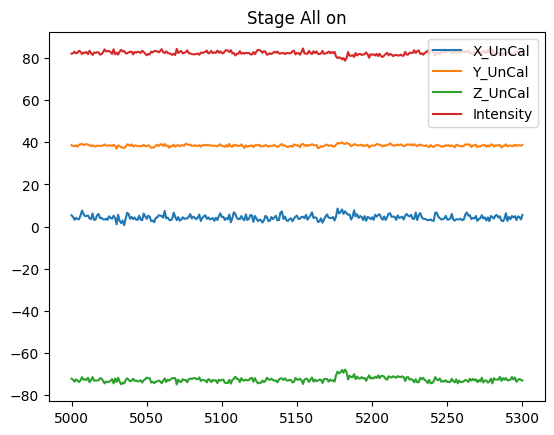

In [123]:
df_on[['X_UnCal', 'Y_UnCal', 'Z_UnCal', 'Intensity']].loc[start:start+size].plot(title="Stage All on")

<AxesSubplot: title={'center': 'Stage All off'}>

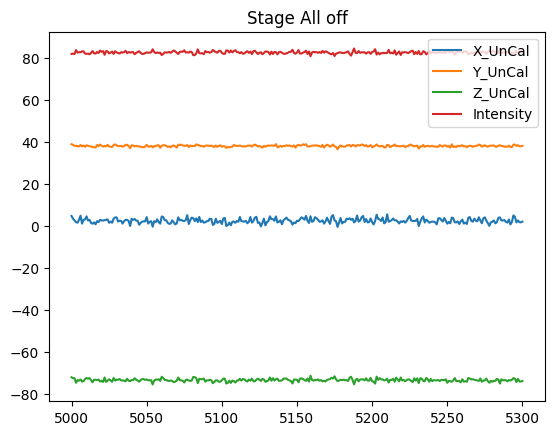

In [124]:
df_off[['X_UnCal', 'Y_UnCal', 'Z_UnCal', 'Intensity']].loc[start:start+size].plot(title="Stage All off")

# Fourier

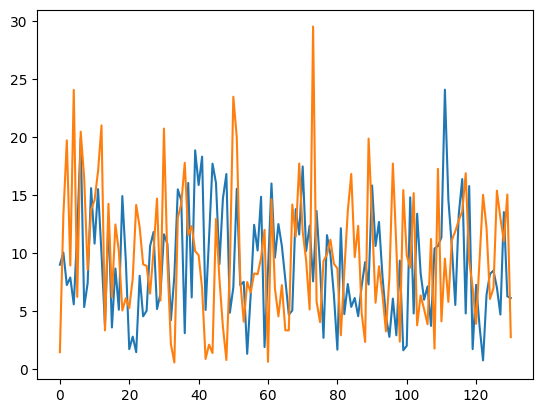

In [125]:
from scipy.fft import fft, fftfreq, rfft, rfftfreq
from matplotlib import pyplot as plt
import numpy as np
yf_off = rfft(df_off['Intensity'].loc[start:start+size].to_numpy())
yf_on = rfft(df_on['Intensity'].loc[start:start+size].to_numpy())
# print(yf_off)
# n of samples, spacing
#xf = rfftfreq(len(x), (x[1] - x[0]) / 1000)
plt.plot(np.abs(yf_off)[20:])
plt.plot(np.abs(yf_on)[20:])
plt.show()